In [29]:
# import tensorflow
import tensorflow as tf
# To plot the image
import matplotlib.pyplot as plt
# to handle the  data structure
import numpy as np


In [30]:
# Download the MNIST dataset
mnist = tf.keras.datasets.mnist
# fashion_mnist = tf.keras.datasets.fashion_mnist
# Splitting it into training and testing population
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

In [31]:
# Reshaping the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [32]:
# Adding random noise into the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

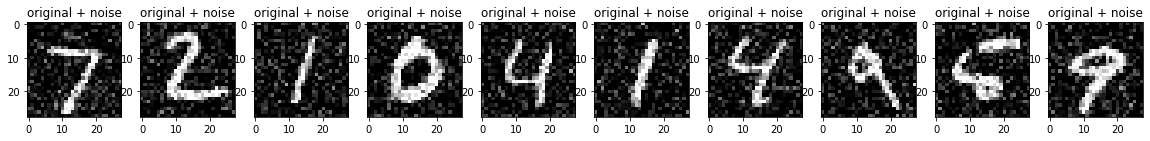

In [33]:
# Plot noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [34]:
class Denoise(tf.keras.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()


In [35]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [36]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0156 - val_loss: 0.0039
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [37]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable 

In [38]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
print("Encoded Images:",encoded_imgs.shape)
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print("Decoded Images:",decoded_imgs.shape)

Encoded Images: (10000, 7, 7, 8)
Decoded Images: (10000, 28, 28, 1)


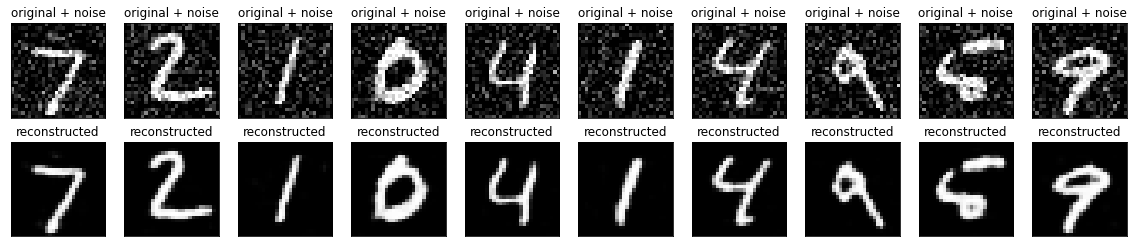

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()